In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# Loading Dataset
df=pd.read_csv("credit_card.csv",sep=",")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## Question 1

In [4]:
df.describe(include="O")

,CUST_ID
count,8950
unique,8950
top,C10001
freq,1


In [5]:
dfo=df.select_dtypes("O")
dfo

,CUST_ID
0,C10001
1,C10002
2,C10003
3,C10004
4,C10005
...,...
8945,C19186
8946,C19187
8947,C19188
8948,C19189


There no categorical attributes except for CUST_ID, and we cannot create inference out of ID column.

In [6]:
df1=df.drop(["CUST_ID"],axis=1)
df1

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## Question 2

#### a). Missing Value

In [7]:
df1.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<AxesSubplot:>

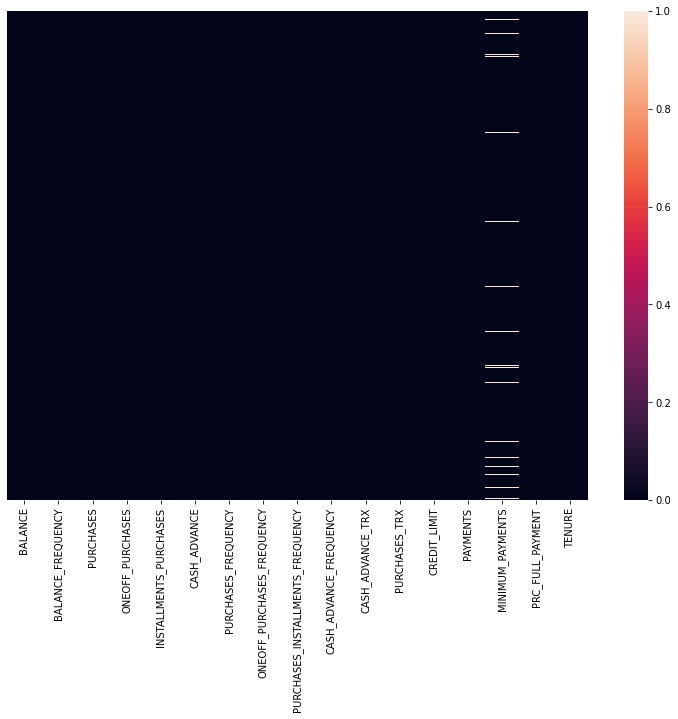

In [8]:
f, ax = plt.subplots(figsize=(13, 9))
sns.heatmap(df1.isnull(),yticklabels=False)

In [9]:
from sklearn.impute import KNNImputer

In [10]:
imputer = KNNImputer(n_neighbors=3)
df2 = pd.DataFrame(imputer.fit_transform(df1),columns=df1.columns)
df2

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,448.208854,0.000000,12.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,325.594462,48.886365,0.500000,6.0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,275.861322,174.958656,0.000000,6.0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0.0,5.0,1000.0,81.270775,82.418369,0.250000,6.0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2.0,0.0,500.0,52.549959,55.755628,0.250000,6.0


In [11]:
df2.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

#### b). Outliers using Z-score

In [16]:
def ch(df2,i):
    df3=df2.copy()
    zdata=df2.copy()
    z = np.abs(zscore(df3[i]))
    df3['Zscore'] = z
    data_z = df3[df3['Zscore']<3]
    return data_z
from scipy.stats import zscore
df3=df2.copy()
for i in df2.columns:
    df3=ch(df3,i).copy()
df3

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Zscore
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,0.370065
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.370065
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,0.370065
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,448.208854,0.000000,12.0,0.370065
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,0.370065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8876,121.294493,0.750000,385.26,385.26,0.00,169.554775,0.500000,0.500000,0.000000,0.125000,3.0,7.0,500.0,98.225317,113.944625,0.000000,8.0,2.538370
8877,55.147722,0.875000,163.31,0.00,163.31,0.000000,0.875000,0.000000,0.750000,0.000000,0.0,7.0,1000.0,62.619008,109.580539,0.000000,8.0,2.538370
8878,869.328293,0.750000,0.00,0.00,0.00,1153.925205,0.000000,0.000000,0.000000,0.125000,3.0,0.0,1200.0,150.755024,337.986933,0.000000,8.0,2.538370
8879,137.744895,1.000000,441.00,0.00,441.00,0.000000,0.750000,0.000000,0.625000,0.000000,0.0,6.0,1000.0,169.249683,124.639905,0.000000,8.0,2.538370


#### c). Correlation

<AxesSubplot:>

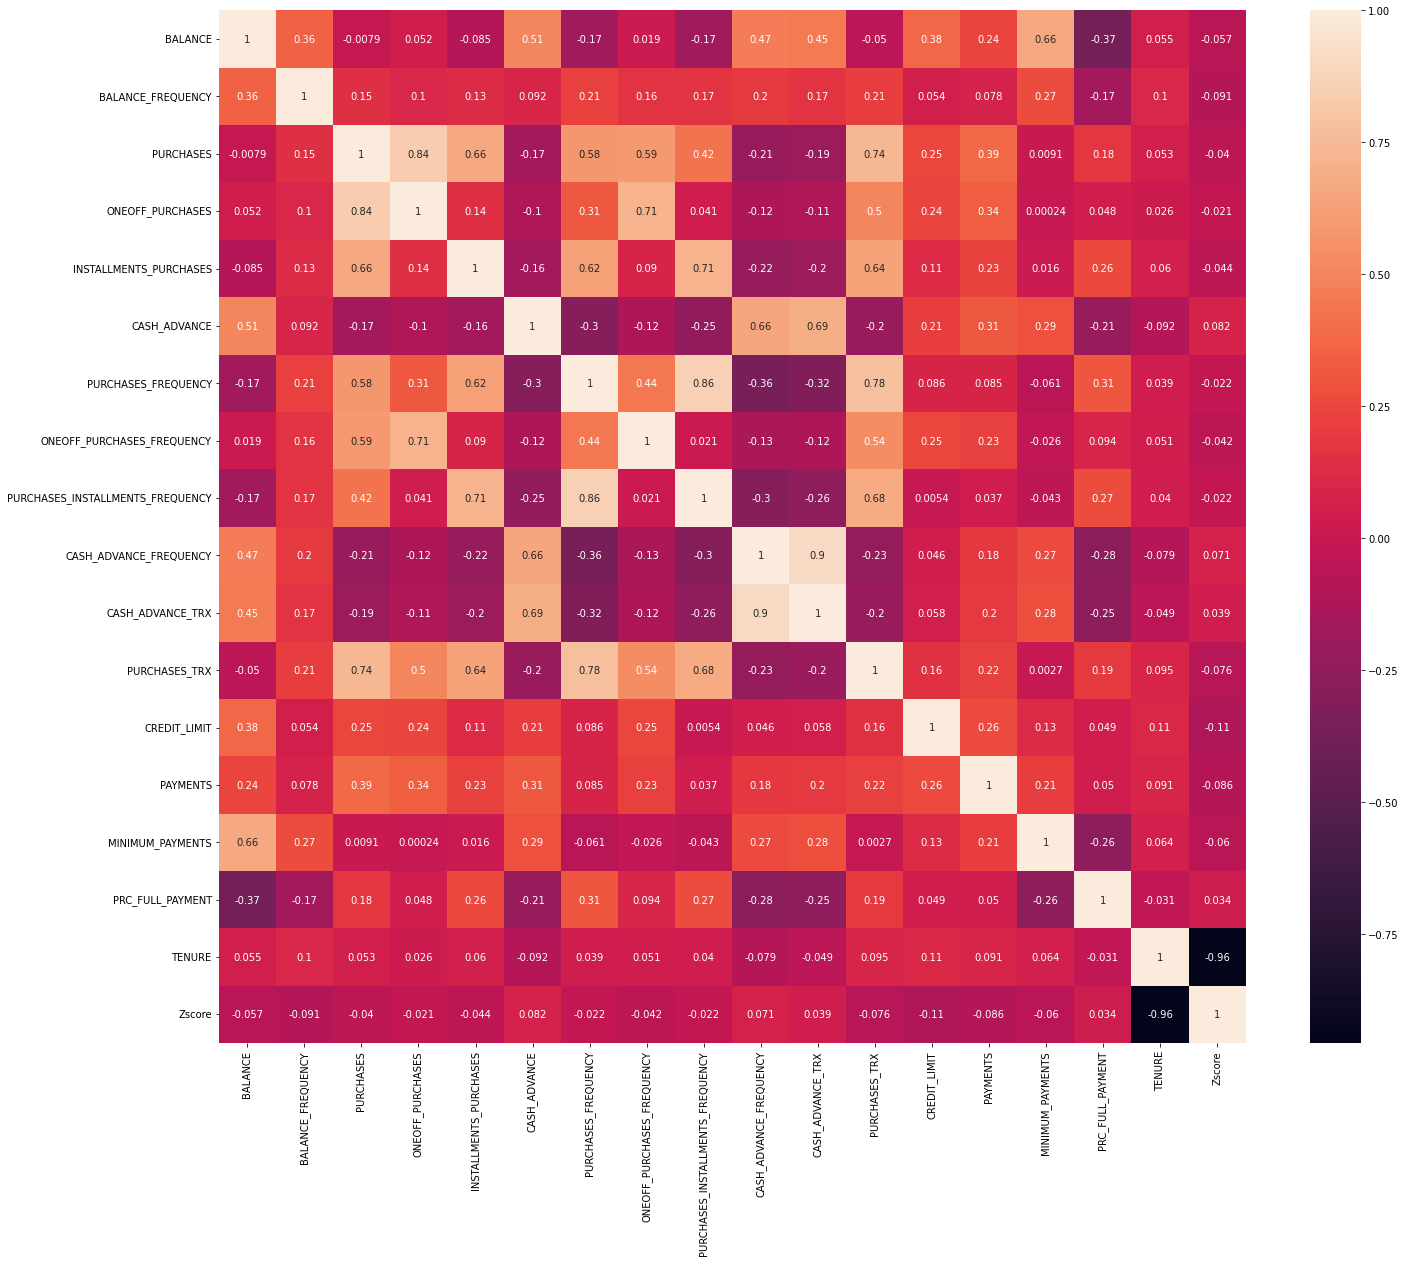

In [17]:
f, ax = plt.subplots(figsize=(23, 19))
sns.heatmap(df3.corr(),annot=True)

In [18]:
df4=df3.drop(["CASH_ADVANCE_FREQUENCY","ONEOFF_PURCHASES","PURCHASES_INSTALLMENTS_FREQUENCY"],axis=1)
df4

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Zscore
0,40.900749,0.818182,95.40,95.40,0.000000,0.166667,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,0.370065
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.370065
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,0.370065
3,1666.670542,0.636364,1499.00,0.00,205.788017,0.083333,0.083333,1.0,1.0,7500.0,0.000000,448.208854,0.000000,12.0,0.370065
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,0.370065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8876,121.294493,0.750000,385.26,0.00,169.554775,0.500000,0.500000,3.0,7.0,500.0,98.225317,113.944625,0.000000,8.0,2.538370
8877,55.147722,0.875000,163.31,163.31,0.000000,0.875000,0.000000,0.0,7.0,1000.0,62.619008,109.580539,0.000000,8.0,2.538370
8878,869.328293,0.750000,0.00,0.00,1153.925205,0.000000,0.000000,3.0,0.0,1200.0,150.755024,337.986933,0.000000,8.0,2.538370
8879,137.744895,1.000000,441.00,441.00,0.000000,0.750000,0.000000,0.0,6.0,1000.0,169.249683,124.639905,0.000000,8.0,2.538370


##### There is no high negative correlation, and there are a few high positive correlation betwwen attributes.
##### I am removing the attributes which has a correlation above 0.85
##### There are 3 attributes namely:
- *CASH_ADVANCE_FREQUENCY and CASH_ADVANCE_TRX
- *ONEOFF_PURCHASES and PURCHASES
- *PURCHASES_INSTALLMENTS_FREQUENCY and PURCHASES_FREQUENCY 

## Question 3

In [19]:
from scipy.stats import zscore
Scaled=df4.apply(zscore)
Scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Zscore
0,-0.790435,-0.305307,-0.684244,-0.430960,-0.542741,-0.770948,-0.639702,-0.621096,-0.697040,-1.006681,-0.857595,-0.572117,-0.520418,0.31915,-0.254506
1,1.413096,0.111262,-0.814749,-0.666612,5.451293,-1.196770,-0.639702,0.630338,-0.867452,1.214134,3.106592,0.773569,0.260664,0.31915,-0.254506
2,0.920113,0.527831,0.242928,-0.666612,-0.542741,1.358155,3.081093,-0.621096,0.155018,1.399202,-0.430548,0.131539,-0.520418,0.31915,-0.254506
3,0.342685,-1.138445,1.235845,-0.666612,-0.351292,-0.983860,-0.329637,-0.308238,-0.782246,1.399202,-1.062654,-0.126793,-0.520418,0.31915,-0.254506
4,-0.249016,0.527831,-0.792862,-0.666612,-0.542741,-0.983860,-0.329637,-0.621096,-0.782246,-0.932653,-0.373372,-0.420239,-0.520418,0.31915,-0.254506


In [20]:
covMatrix = np.cov(Scaled,rowvar=False)
e_vals, e_vecs = np.linalg.eig(covMatrix)
print('\nEigenvalues \n%s' %e_vals)


Eigenvalues 
[3.84721834 2.95557326 1.94926614 1.23461154 0.99835399 0.04220762
 0.12472241 0.17559798 0.2208902  0.26852432 0.34827841 0.85782409
 0.75554929 0.57140334 0.65221719]


In [21]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 25.64429592  45.34517813  58.33834705  66.5678627   73.22256303
  78.9405371   83.97678089  88.32424682  92.13303413  94.4545438
  96.2444389   97.71682057  98.8872991   99.71865782 100.        ]


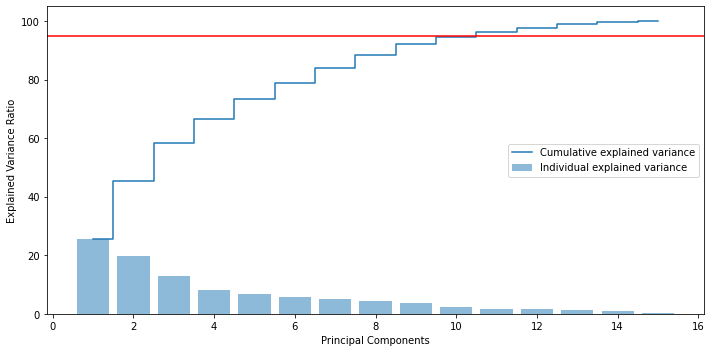

In [22]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.axhline(y = 95, color = 'r', linestyle = '-')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
pca.fit(Scaled)

PCA(n_components=11)

In [24]:
sum(pca.explained_variance_ratio_)

0.9624443890015778

### Choosing 11 components provides us 96% explained variance

In [25]:
df5=pd.DataFrame(pca.transform(Scaled))
df5

,0,1,2,3,4,5,6,7,8,9,10
0,-1.151955,-1.774150,-0.916719,-0.566099,0.056689,-0.211864,0.434935,-0.202615,-0.199112,-0.121279,0.234518
1,-2.692649,4.141537,0.527629,3.289250,1.011433,-0.479197,-0.252953,0.519581,-0.845299,1.925686,2.300930
2,1.627612,1.092530,-0.295826,-0.619559,-3.099179,0.035431,-0.567287,0.177694,0.559201,0.490568,0.010039
3,-0.619343,-0.207695,-0.628136,0.683301,-1.296826,1.265155,0.421418,-1.080866,0.227107,-1.273250,0.225789
4,-1.277985,-1.057468,-0.906070,-0.833543,-0.254254,-0.333902,0.225229,0.333582,-0.783772,-0.129426,0.293161
...,...,...,...,...,...,...,...,...,...,...,...
6698,-1.045535,-2.484665,6.449663,-1.156032,-1.471874,-0.673342,0.505474,0.078367,0.386520,-0.122368,-0.434715
6699,-0.855286,-2.933470,6.253780,-1.805112,-0.275834,0.429637,0.109893,-0.306977,-0.479830,0.889911,-0.387885
6700,-2.909353,-2.103703,6.313447,-0.754725,-0.388379,0.259915,0.411575,-0.204945,-0.211722,-0.251303,0.088474
6701,-0.568220,-2.611053,6.315890,-2.000099,0.052535,0.442020,0.087893,-0.371653,-1.007703,0.324660,-0.197700


## Question 4

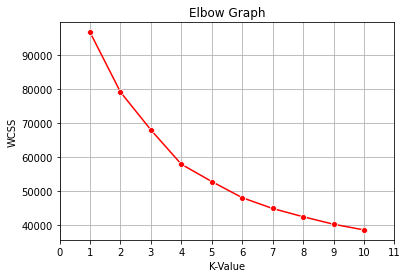

In [27]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state = 42)
    kmeans.fit(df5)
    wcss.append(kmeans.inertia_)
plt.grid()
sns.lineplot(x=range(1,11), y=wcss, color="red", marker ="8")
plt.xlabel("K-Value")
plt.xticks(np.arange(11.5))
plt.ylabel("WCSS")
plt.title("Elbow Graph")
plt.show()

### 4 seems to be the ideal K value based on the graphs shown above

## Question 5

In [28]:
from sklearn.metrics import silhouette_score
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, max_iter=50, random_state=50)
    kmeans.fit(df5)
    cluster_labels = kmeans.labels_
    silhoutte_avg = silhouette_score(df5, cluster_labels)
    print("For n_clusters = {0}, The Silhouette Score = {1}".format(i, silhoutte_avg))

For n_clusters = 2, The Silhouette Score = 0.19742926917469183
For n_clusters = 3, The Silhouette Score = 0.20830074579307278
For n_clusters = 4, The Silhouette Score = 0.23145051784237866
For n_clusters = 5, The Silhouette Score = 0.19588100355850474
For n_clusters = 6, The Silhouette Score = 0.20273277524501607
For n_clusters = 7, The Silhouette Score = 0.2108153888113841
For n_clusters = 8, The Silhouette Score = 0.21391966275412072
For n_clusters = 9, The Silhouette Score = 0.19882668641552922
For n_clusters = 10, The Silhouette Score = 0.19679288953241836


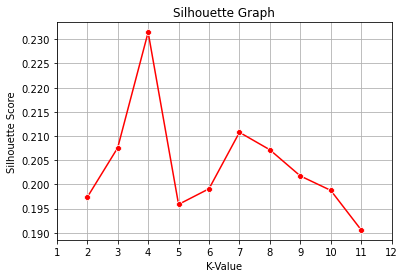

In [29]:
silhouette_coefficients=[]
for i in range(2,12):
    kmeans = KMeans(n_clusters=i)     
    kmeans.fit(df5)
    cluster_labels = kmeans.labels_
    silhoutte_avg = silhouette_score(df5, cluster_labels)
    silhouette_coefficients.append(silhoutte_avg)
plt.grid()
sns.lineplot(x=range(2,12),y=silhouette_coefficients,color="red",marker ="8")
plt.xlabel("K-Value")
plt.xticks(np.arange(1,12.5))
plt.ylabel("Silhouette Score")
plt.title("Silhouette Graph")
plt.show()

### 4 is the ideal k value